<a href="https://colab.research.google.com/github/rm8300/Task-1/blob/main/Score_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK-1

##Prediction using Supervised ML

#Rishabh Mishra


In [1]:
#importing all the neccessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the data
df=pd.read_csv('http://bit.ly/w-data')

In [3]:
#shows top 5 data 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Provides information  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#To check null values in the data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'HOURS VS PERCENTAGE')

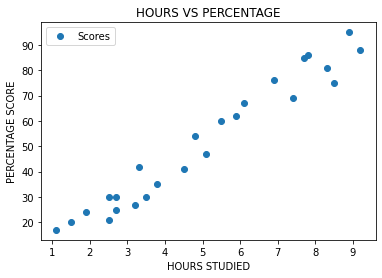

In [6]:
# Plotting the data in given in 2-D to understand the distribution of data and the relation between hours studied and scores.
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORE')
plt.title('HOURS VS PERCENTAGE')

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:

# Selecting the values of data from the dataframe
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [9]:
#splitting the data into Train and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#Training The Model

In [10]:
#training data are trained using Linear Regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Plotting the best fit line for linear regression model

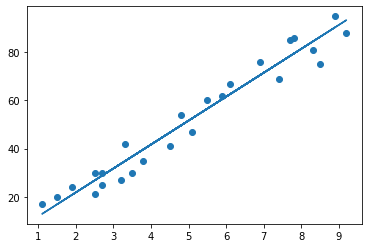

In [11]:
line = reg.coef_*X + reg.intercept_
plt.scatter(X,y)
plt.plot(X,line)

#Making Prediction

In [12]:
#using the trained data we are predicting the students score using predict
pred=reg.predict(X_test)

In [13]:
new = pd.DataFrame({'Actual': y_test , 'Predicted': pred})
new

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [14]:
# what will the student score , if he studies for any given amount of time can be calculated directly using predict function.
hours = 9.25
own_pred = round(reg.predict([[9.25]]) [0],2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))


No of Hours = 9.25
Predicted Score = 93.89


In [15]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))

R^2: 0.9367661043365056
Mean Absolute Error: 4.130879918502482
